<a href="https://www.kaggle.com/code/risakashiwabara/the-power-of-colors-rethinking-heatmaps?scriptVersionId=259057842" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

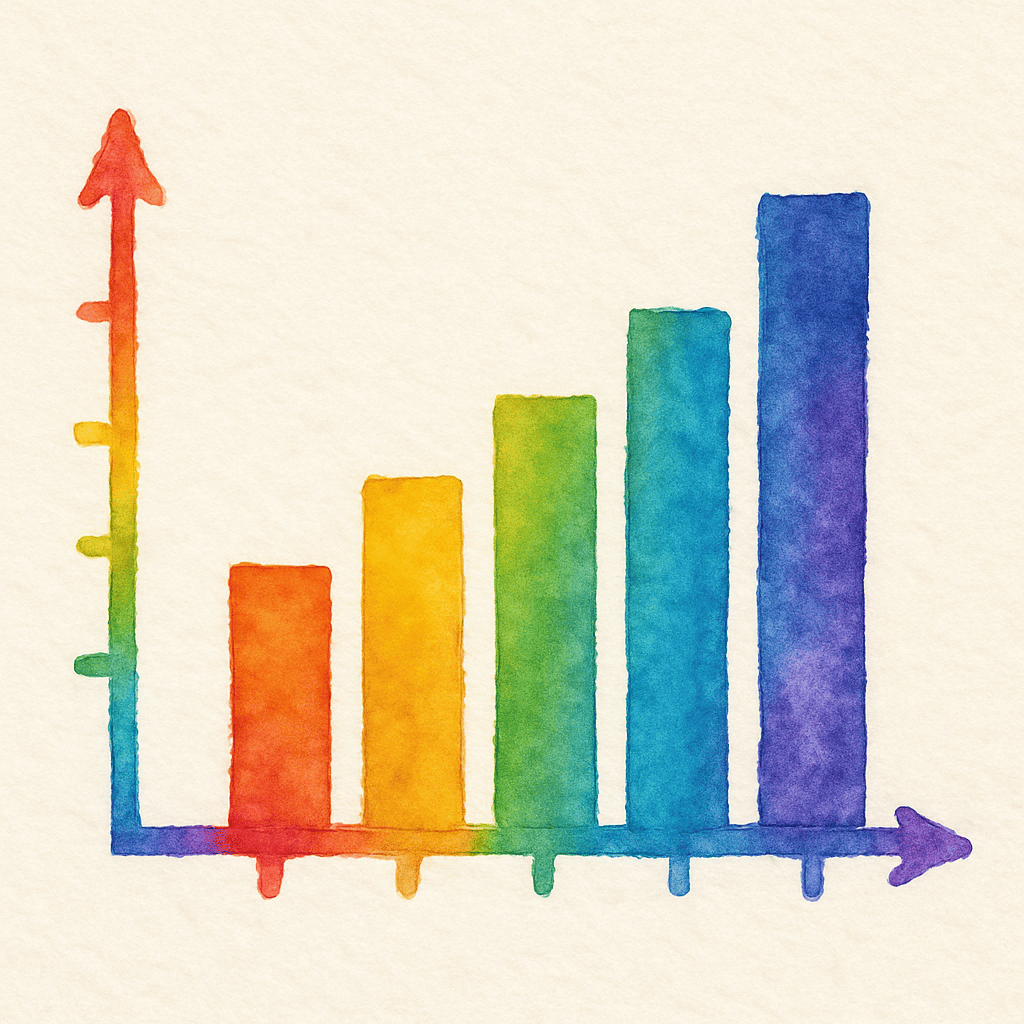

## The Power of Colors: Rethinking Heatmaps
### 1. Introduction

Heatmaps are one of the most common visualization tools in data analysis.
They are often used to display correlation matrices, highlight clusters, or show the intensity of values across a grid.

However, the choice of colormap dramatically affects how we perceive information.
Some color schemes can distort values, mislead interpretation, or exclude those with color vision deficiencies.

👉 In this notebook, we will:


* Explore different colormaps and their impact on interpretation. 
* Compare static and interactive heatmaps.
* Introduce clustering heatmaps to reveal hidden structures.
* Provide a reusable toolkit for better heatmap visualization.


<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/XNRWVtpC/publicdomainq-0062147.jpg);font-family:camtasia;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px"> Dataset </p>

 We will use the Quality of Sleep dataset, which contains multiple numeric features related to health and lifestyle.

In [1]:
import pandas as pd
data_bedtime = pd.read_csv('/kaggle/input/japanquality-of-sleep/sleepingtime.csv')
df = data_bedtime.assign(total  = data_bedtime[['Eat well Drink well','Sometimes eat Sometimes drink','Hardly eat or drink','Not eating or drinking at all','Other']].sum(axis=1))
df.head(5)

,sex,time,terms,Eat well Drink well,Sometimes eat Sometimes drink,Hardly eat or drink,Not eating or drinking at all,Other,total
0,woman,Before 9:00 p.m.,Carbonated drinks,18,90,95,155,5,363
1,woman,9:00 p.m.-9:29 p.m.,Carbonated drinks,101,440,465,529,23,1558
2,woman,9:30 p.m. to 9:59 p.m.,Carbonated drinks,187,702,645,700,32,2266
3,woman,10:00 p.m. to 10:29 p.m.,Carbonated drinks,302,1006,763,815,42,2928
4,woman,10:30 p.m. to 10:59 p.m.,Carbonated drinks,221,624,458,487,25,1815


<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/XNRWVtpC/publicdomainq-0062147.jpg);font-family:camtasia;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px"> Traditional Heatmap </p>

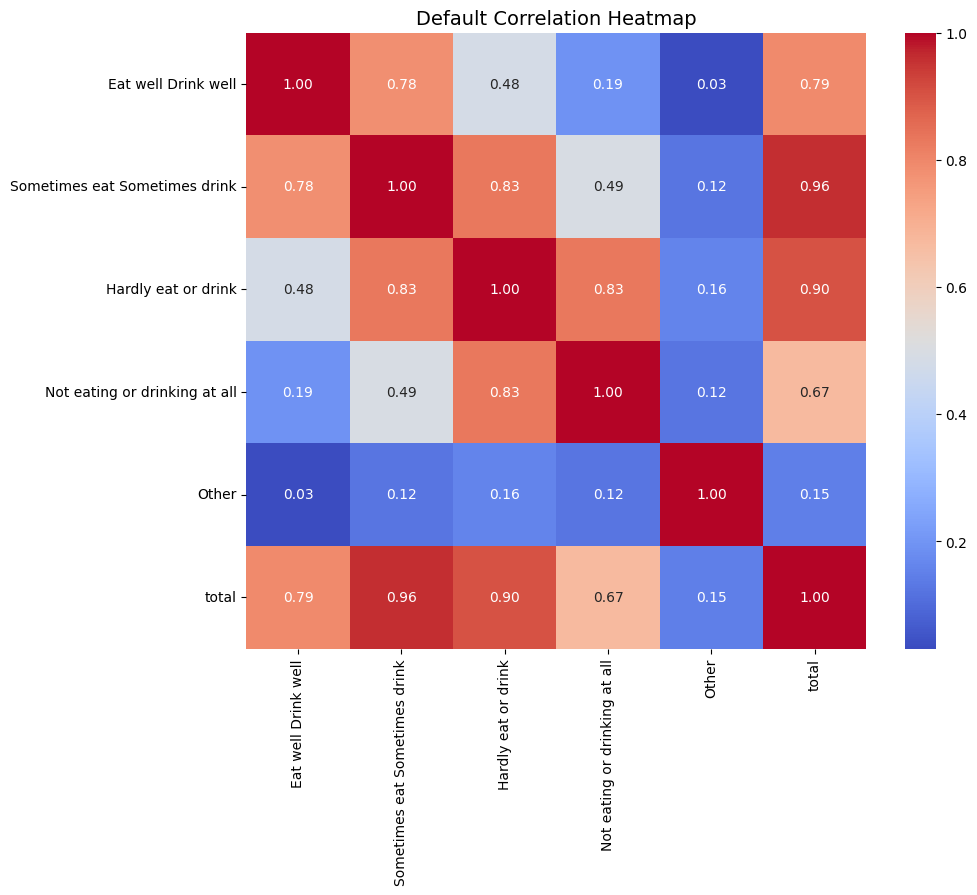

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Default Correlation Heatmap", fontsize=14)
plt.show()


✅ While this works, notice how the red-blue colormap might exaggerate differences.
Let’s test alternative palettes.

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/XNRWVtpC/publicdomainq-0062147.jpg);font-family:camtasia;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px"> Comparing Calormaps </p>

Different colormaps tell different stories.
 Here we compare Viridis, Cividis, RdYlGn, and Plasma.

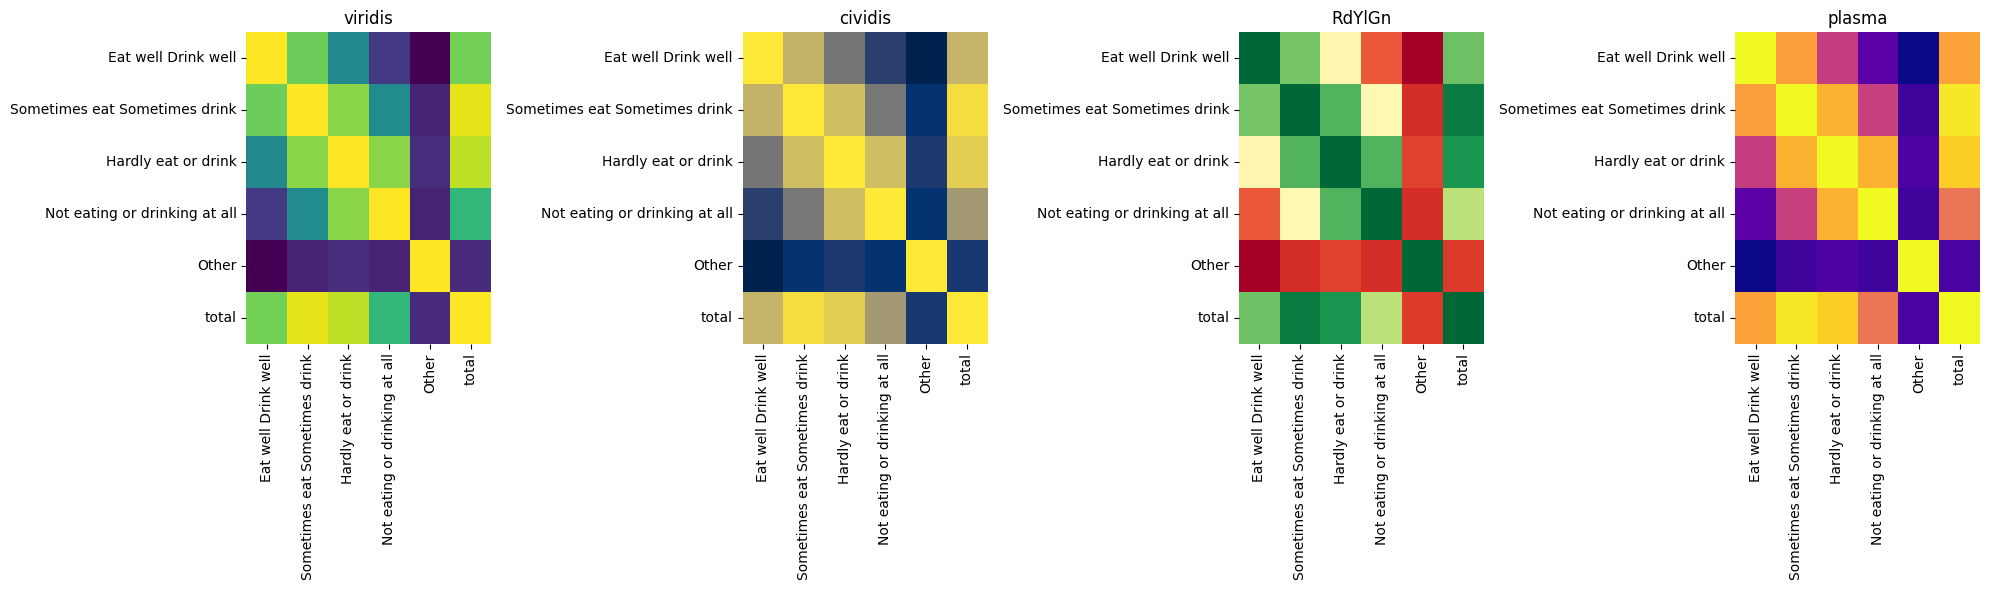

In [3]:
palettes = ['viridis', 'cividis', 'RdYlGn', 'plasma']

fig, axes = plt.subplots(1, len(palettes), figsize=(20, 6))
for ax, pal in zip(axes, palettes):
    sns.heatmap(corr, cmap=pal, cbar=False, ax=ax)
    ax.set_title(pal, fontsize=12)
plt.tight_layout()
plt.show()


📝 Key insight: Viridis and Cividis are perceptually uniform, making them more accessible for people with color vision deficiencies.

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/XNRWVtpC/publicdomainq-0062147.jpg);font-family:camtasia;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px"> Clustering Heatmap </p>

A standard heatmap only shows values.

By adding clustering, we can group similar features together and discover hidden structures.

This helps identify groups of features that strongly correlate with each other.

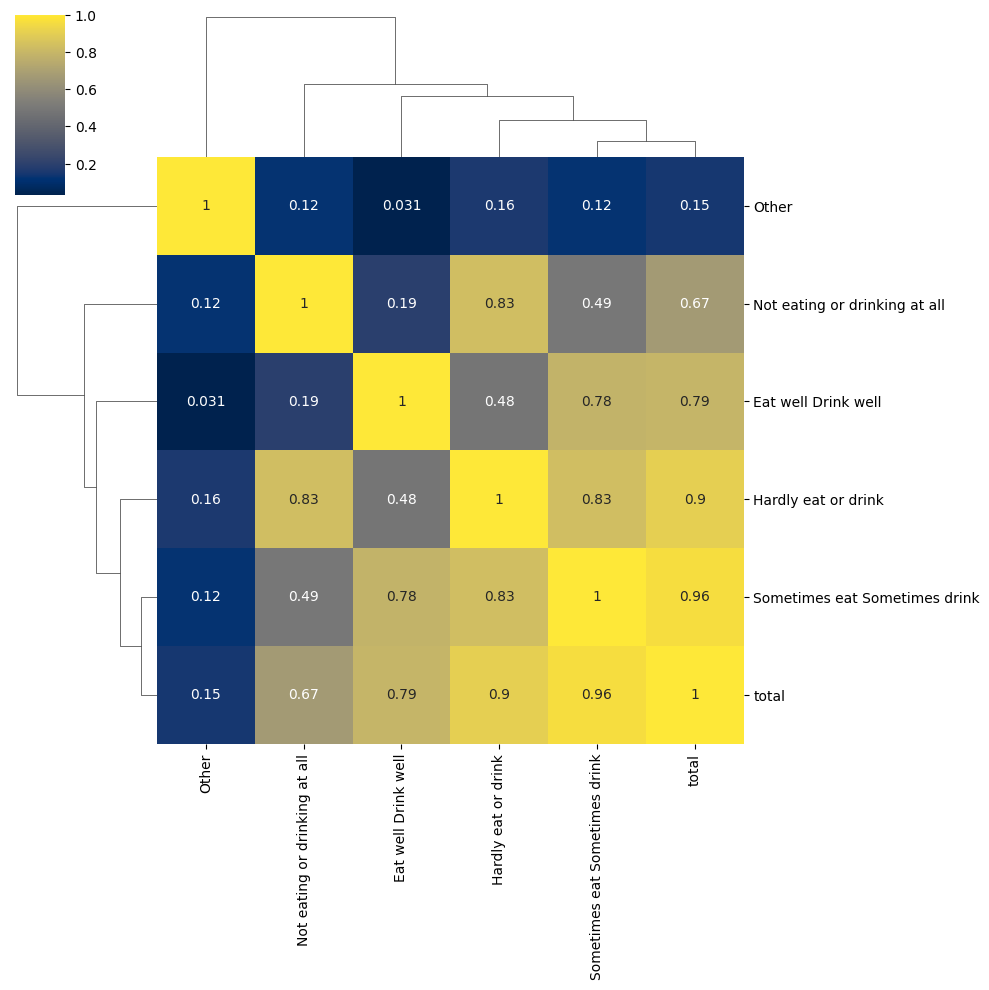

In [4]:
sns.clustermap(corr, cmap="cividis", annot=True, figsize=(10,10))
